In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/insurance_data.csv")

In [ ]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [ ]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df.shape

(27, 2)

In [ ]:
df.info

<bound method DataFrame.info of     age  bought_insurance
0    22                 0
1    25                 0
2    47                 1
3    52                 0
4    46                 1
5    56                 1
6    55                 0
7    60                 1
8    62                 1
9    61                 1
10   18                 0
11   28                 0
12   27                 0
13   29                 0
14   49                 1
15   55                 1
16   25                 1
17   58                 1
18   19                 0
19   18                 0
20   21                 0
21   26                 0
22   40                 1
23   45                 1
24   50                 1
25   54                 1
26   23                 0>

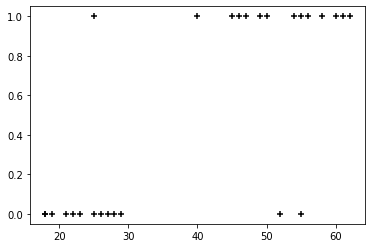

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker="+",color="black")

(array([5., 4., 3., 0., 0., 1., 3., 3., 4., 4.]),
 array([18. , 22.4, 26.8, 31.2, 35.6, 40. , 44.4, 48.8, 53.2, 57.6, 62. ]),
 <a list of 10 Patch objects>)

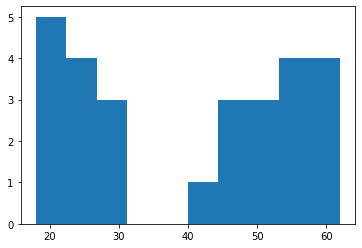

In [ ]:
plt.hist(df["age"])

<BarContainer object of 27 artists>

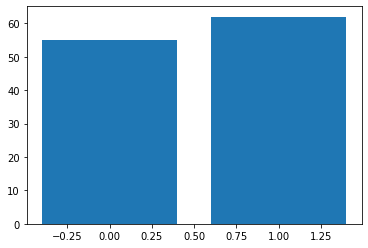

In [ ]:
plt.bar(df["bought_insurance"],height=df["age"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f3869be8a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3869beca10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3869b72a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3869b72510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3869c2fd50>,
  <matplotlib.lines.Line2D at 0x7f3869bec4d0>]}

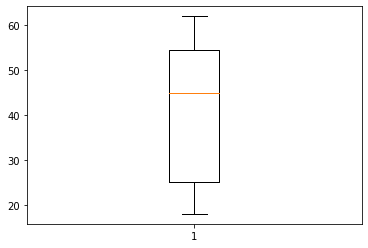

In [ ]:
plt.boxplot(df["age"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f3869b4eb90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3869b56b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3869b5dbd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3869b5d690>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3869b995d0>,
  <matplotlib.lines.Line2D at 0x7f3869b56650>]}

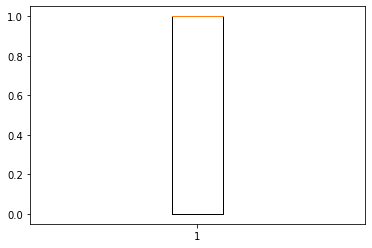

In [ ]:
plt.boxplot(df["bought_insurance"])

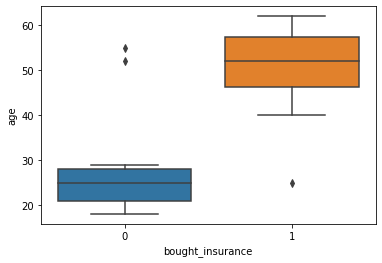

In [ ]:
import seaborn as sns
sns.boxplot(x=df["bought_insurance"],y=df["age"])

In [ ]:
from sklearn.model_selection import train_test_split
x=df["age"].values
y=df["bought_insurance"].values
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123)

In [ ]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((18,), (9,), (18,), (9,))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
xtrain=xtrain.reshape(-1,1) 

In [ ]:
ytrain=ytrain.reshape(-1,1) 

In [ ]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
model.predict(xtrain)

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
xtest=xtest.reshape(-1,1) 

In [ ]:
ytest=ytest.reshape(-1,1) 

In [ ]:
ypred=model.predict(xtest)

In [ ]:
model.predict_proba(xtest)

array([[0.35021936, 0.64978064],
       [0.1497051 , 0.8502949 ],
       [0.10491511, 0.89508489],
       [0.08728917, 0.91271083],
       [0.24478188, 0.75521812],
       [0.7523234 , 0.2476766 ],
       [0.78825986, 0.21174014],
       [0.86092954, 0.13907046],
       [0.77078609, 0.22921391]])

In [ ]:

xtest

array([[45],
       [56],
       [60],
       [62],
       [50],
       [28],
       [26],
       [21],
       [27]])

In [ ]:
#to measure accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
accuracy_score(ytest,ypred)

1.0

In [ ]:
confusion_matrix(ytest,ypred)


array([[4, 0],
       [0, 5]])

In [ ]:
list=classification_report(ytest,ypred)

In [ ]:
print(list)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

